In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('../output/test.csv', sep=',', header=None)

In [5]:
test.sort_values(by=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1137,0,Male,35-39,White,Never-married,Higher education,North America,State-gov,Adm-clerical,<=50K,42983,40-50k,1519478857123,1519478857626
480,1,Male,45-49,White,Married-civ-spouse,Higher education,North America,Self-emp-not-inc,Exec-managerial,<=50K,96667,90-100k,1519478857193,1519478857520
250,2,Male,35-39,White,Divorced,Secondary education,North America,Private,Handlers-cleaners,<=50K,7556,0-10k,1519478857193,1519478857536
2280,3,Male,50-54,Black,Married-civ-spouse,Secondary education,North America,Private,Handlers-cleaners,<=50K,98908,90-100k,1519478857194,1519478857776
12263,4,Female,25-29,Black,Married-civ-spouse,Higher education,North America,Private,Prof-specialty,<=50K,48652,40-50k,1519478857194,1519478858084
1549,5,Female,35-39,White,Married-civ-spouse,Higher education,North America,Private,Exec-managerial,<=50K,15841,10-20k,1519478857194,1519478857668
666,7,Male,50-54,White,Married-civ-spouse,Secondary education,North America,Self-emp-not-inc,Exec-managerial,>50K,60188,60-70k,1519478857194,1519478857537
562,8,Female,30-34,White,Never-married,Higher education,North America,Private,Prof-specialty,>50K,42045,40-50k,1519478857194,1519478857566
649,9,Male,40-44,White,Married-civ-spouse,Higher education,North America,Private,Exec-managerial,>50K,55831,50-60k,1519478857194,1519478857531
4582,10,Male,35-39,Black,Married-civ-spouse,Higher education,North America,Private,Exec-managerial,>50K,81680,80-90k,1519478857194,1519478857885


### Output Filenames
Output filenames are named: 

    "output-n_" + streamLength + "k_" + k + "l_" + l + "p_" + parallelism;




In [11]:
## READ FILE ACCORDING TO PARAMETERS ##

k = 10
l = 4
p = 4
n = 20000


filename = "output-n_{}k_{}l_{}p_{}.csv".format(n,k,l,p)
names = ["id","sex","age","race","marst","educ","country","workclass","occ","salary","sensitive","sensitive_class","ingTimestamp","procTimestamp","latency"]
data = pd.read_csv('../output/' + filename, sep=',', header=None, names = names)

In [23]:
## TOTAL RUNNING TIME
def TotalRunningTime(data): 
    return data.max(axis = 0)["procTimestamp"] - data.min(axis = 0)["ingTimestamp"]
    
print("Total Running Time: {} ms.".format(TotalRunningTime(data)))

Total Running Time: 17148 ms.


Average latency: 1211.54 ms


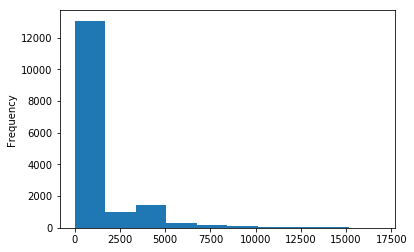

In [78]:
## LATENCY DISTRIBUTION
def PlotLatencyDistribution(data):
    %matplotlib inline
    data["latency"].plot.hist(bins = 10)
    
    
    average = data["latency"].sum()/data["latency"].count()
    print("Average latency: {} ms".format(round(average,2)))

PlotLatencyDistribution(data)
